In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv("Churn_Modelling.csv")

In [86]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
Geography=pd.get_dummies(df["Geography"],drop_first=True).astype(int)
Gender=pd.get_dummies(df["Gender"],drop_first=True).astype(int)

In [88]:
df.drop(["Geography","Gender"],inplace=True,axis=1)

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


In [90]:
df=pd.concat([df,Geography,Gender],axis=1)

In [91]:
### Dependent and Independent Variables

In [92]:
X=df.drop(["Exited","RowNumber","CustomerId","Surname"],axis=1)
y=df["Exited"]

In [93]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [94]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [97]:
### Standard Scaler
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()

In [99]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,ELU,PReLU

In [101]:
model=Sequential()

In [102]:
model.add(Dense(units=11,activation="relu"))

In [103]:
model.add(Dense(units=7,activation="relu"))

In [104]:
model.add(Dense(units=5,activation="relu"))


In [105]:
model.add(Dense(1,activation="sigmoid"))

In [106]:
import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [107]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [108]:
model_history=model.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7948 - loss: 0.5450 - val_accuracy: 0.7896 - val_loss: 0.4649
Epoch 2/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8009 - loss: 0.4365 - val_accuracy: 0.7896 - val_loss: 0.4446
Epoch 3/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7972 - loss: 0.4258 - val_accuracy: 0.7896 - val_loss: 0.4336
Epoch 4/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8092 - loss: 0.3990 - val_accuracy: 0.8174 - val_loss: 0.4219
Epoch 5/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3964 - val_accuracy: 0.8251 - val_loss: 0.4106
Epoch 6/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8479 - loss: 0.3752 - val_accuracy: 0.8336 - val_loss: 0.3978
Epoch 7/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8442 - loss: 0.3855 - val_accuracy: 0.8340 - val_loss: 0.3959
Epoch 8/1000
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8588 - loss: 0.3454 - 

In [109]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

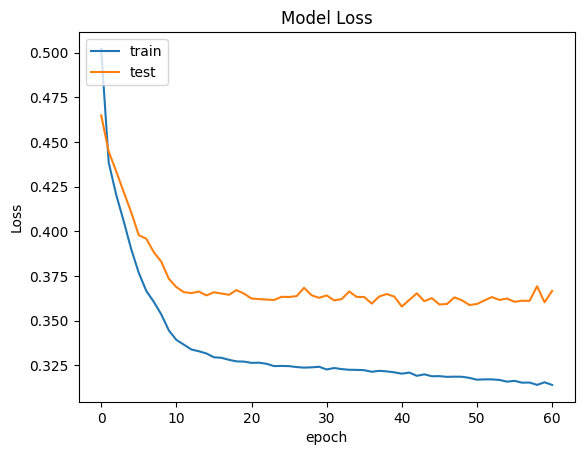

In [110]:

### Plotting the graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

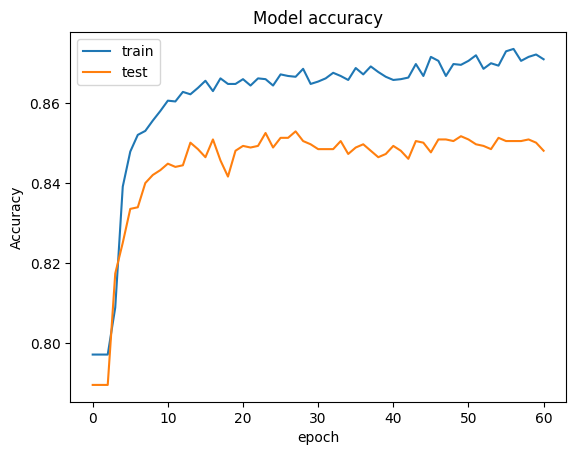

In [111]:

### Plotting the graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [112]:
y_predict=model.predict(X_test_scaled)
y_predict=(y_predict>=0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.856
[[1909   94]
 [ 266  231]]
